## Using K-Means for Uber Trips

In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans, DBSCAN
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

#### Create dataframe from raw data

In [2]:
# read data and split it into columns
df = pd.read_excel('test_task_uber-raw-data-may14.xlsx', names=['data'])
df[['date_time','lat', 'lon', 'base']] = df.data.str.split(",",expand=True)
df[['date','time']] = df.date_time.str.split(" ",expand=True)

In [3]:
# delete worthless columns and convert others into appropriate types
df.drop(['data', 'date_time'], inplace=True, axis=1)
df.lat = pd.to_numeric(df.lat, errors='ignore')
df.lon = pd.to_numeric(df.lon, errors='ignore')
df.time = pd.to_timedelta(df.time)

In [4]:
# create 4 dataframes for each six-hour (quarters) time spans
quarter_0 = pd.to_timedelta('00:00:00')
quarter_1 = pd.to_timedelta('06:00:00')
quarter_2 = pd.to_timedelta('12:00:00')
quarter_3 = pd.to_timedelta('18:00:00')

df_q0 = df.loc[(df.time >= quarter_0) & (df.time < quarter_1), ['lat', 'lon']]
df_q1 = df.loc[(df.time >= quarter_1) & (df.time < quarter_2), ['lat', 'lon']]
df_q2 = df.loc[(df.time >= quarter_2) & (df.time < quarter_3), ['lat', 'lon']]
df_q3 = df.loc[df.time >= quarter_3, ['lat', 'lon']]
df = df.loc[:, ['lat', 'lon']]

### General distribution plot

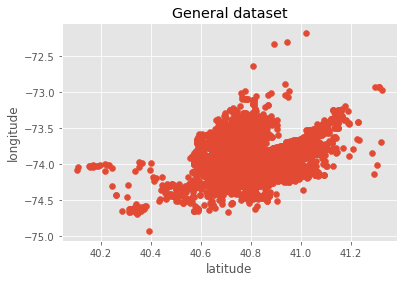

In [5]:
plt.scatter(df.lat, df.lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('General dataset')
plt.show()

### Distribution plots for each quarter

##### First quarter (0:00 - 6:00)

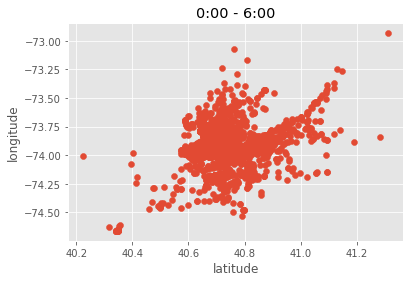

In [6]:
plt.scatter(df_q0.lat, df_q0.lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('0:00 - 6:00')
plt.show()

##### Second quarter (6:00 - 12:00)

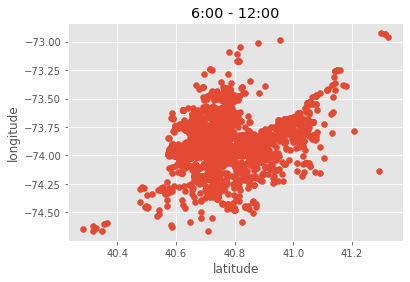

In [7]:
plt.scatter(df_q1.lat, df_q1.lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('6:00 - 12:00')
plt.show()

##### Third quarter (12:00 - 18:00)

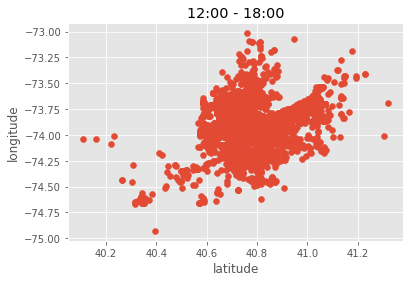

In [8]:
plt.scatter(df_q2.lat, df_q2.lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('12:00 - 18:00')
plt.show()

##### The last quarter (18:00 - 24:00)

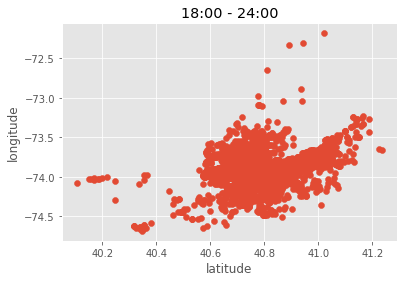

In [9]:
plt.scatter(df_q3.lat, df_q3.lon)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('18:00 - 24:00')
plt.show()

#### Trying the elbow method for optimal clusters number

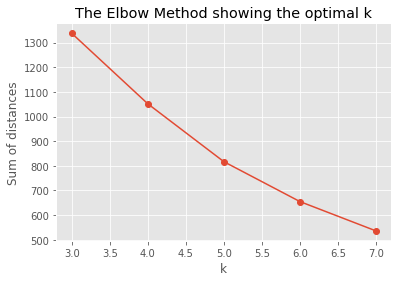

In [10]:
K = range(3, 8)
models = [KMeans(n_clusters=k, random_state=123).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Let's look at elbow plots for each time quarter

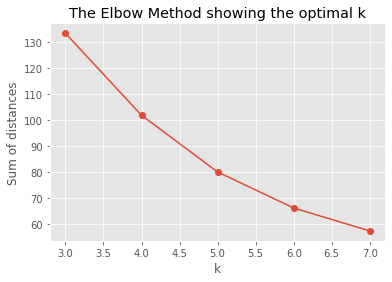

In [11]:
models = [KMeans(n_clusters=k, random_state=123).fit(df_q0) for k in range(3, 8)]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

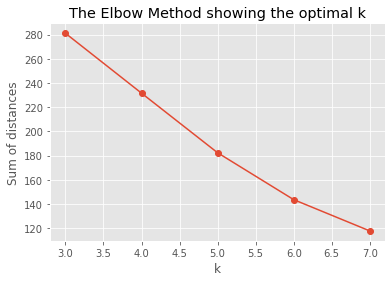

In [12]:
models = [KMeans(n_clusters=k, random_state=123).fit(df_q1) for k in range(3, 8)]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

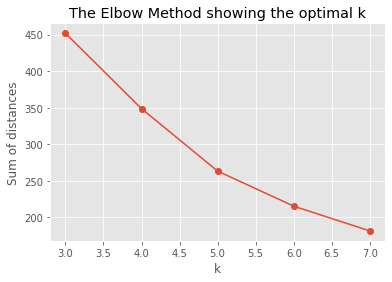

In [13]:
models = [KMeans(n_clusters=k, random_state=123).fit(df_q2) for k in range(3, 8)]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

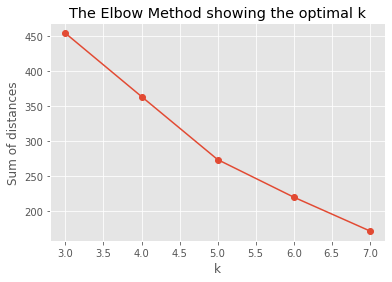

In [14]:
models = [KMeans(n_clusters=k, random_state=123).fit(df_q3) for k in range(3, 8)]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow plots don't show a clearly pronounced inflection, therefore,<br>we'll accept the value of the number of clusters based on the number of bases<br>in the initial data, which, in turn, doesn't contradict the obtained plots as well.

### K-means clustering

#### For general dataset

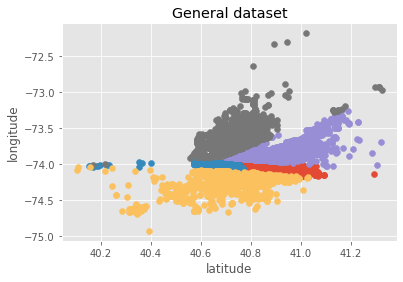

In [15]:
model_gen = KMeans(n_clusters=5, random_state=123)
labels_gen = model_gen.fit(df)
df['cluster'] = model_gen.labels_
for i in df['cluster'].unique():
    plt.scatter(df[df['cluster']==i].lat, df[df['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('General dataset')
plt.show()

#### For each time quarter

##### First quarter (0:00 - 6:00)

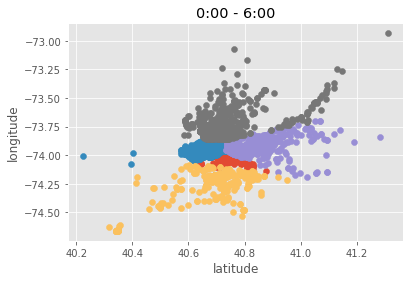

In [16]:
model_q0 = KMeans(n_clusters=5, random_state=123)
labels_q0 = model_q0.fit(df_q0)
df_q0['cluster'] = model_q0.labels_
for i in df_q0['cluster'].unique():
    plt.scatter(df_q0[df_q0['cluster']==i].lat, df_q0[df_q0['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('0:00 - 6:00')
plt.show()

##### Second quarter (6:00 - 12:00)

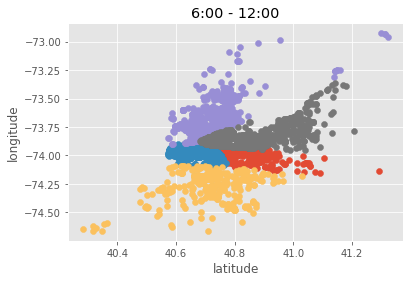

In [17]:
model_q1 = KMeans(n_clusters=5, random_state=123)
labels_q1 = model_q1.fit(df_q1)
df_q1['cluster'] = model_q1.labels_
for i in df_q1['cluster'].unique():
    plt.scatter(df_q1[df_q1['cluster']==i].lat, df_q1[df_q1['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('6:00 - 12:00')
plt.show()

##### Third quarter (12:00 - 18:00)

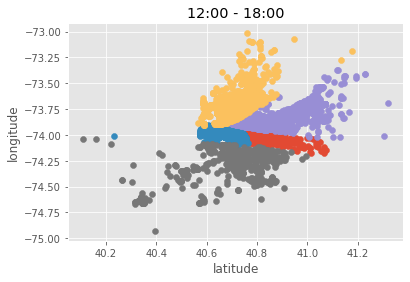

In [18]:
model_q2 = KMeans(n_clusters=5, random_state=123)
labels_q2 = model_q2.fit(df_q2)
df_q2['cluster'] = model_q2.labels_
for i in df_q2['cluster'].unique():
    plt.scatter(df_q2[df_q2['cluster']==i].lat, df_q2[df_q2['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('12:00 - 18:00')
plt.show()

##### The last quarter (18:00 - 24:00)

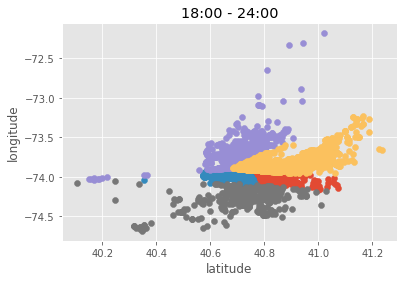

In [19]:
model_q3 = KMeans(n_clusters=5, random_state=123)
labels_q3 = model_q3.fit(df_q3)
df_q3['cluster'] = model_q3.labels_
for i in df_q3['cluster'].unique():
    plt.scatter(df_q3[df_q3['cluster']==i].lat, df_q3[df_q3['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('18:00 - 24:00')
plt.show()

In [20]:
# Create map visualization
new_york = folium.Map(location = [40.7, -74.0], zoom_start = 11)
events = folium.map.FeatureGroup()

# Add markers for general data and each time quarter to map
def add_markers(model, info, color):    
    positions = model.cluster_centers_
    latitudes = [lat[0] for lat in positions]
    longitudes = [lon[1] for lon in positions]
    for lat, lon in zip(latitudes, longitudes):
        folium.Marker([lat, lon], popup=info, icon=folium.Icon(color=color)).add_to(new_york)
        
add_markers(model_gen, 'General data', 'blue')     
add_markers(model_q0, 'First quarter', 'pink')     
add_markers(model_q1, 'Second quarter', 'green')     
add_markers(model_q2, 'Third quarter', 'orange')     
add_markers(model_q3, 'Fourth quarter', 'darkblue')     

new_york.add_child(events)

#### Try DBSCAN method

Due to high complexity O($n^2$) I had to reduce data sampling to 5 days per each base.

In [21]:
# Prepare reduced data 
df = pd.read_excel('test_task_uber_reduced.xlsx', names=['data'])
df[['date_time','lat', 'lon', 'base']] = df.data.str.split(",",expand=True)
df.drop(['data', 'date_time', 'base'], inplace=True, axis=1)
df.lat = pd.to_numeric(df.lat, errors='ignore')
df.lon = pd.to_numeric(df.lon, errors='ignore')

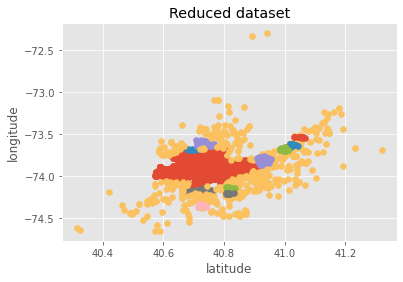

In [22]:
# Trying DBSCAN algorithm for clustering
dbscan = DBSCAN(eps=0.02, min_samples=10).fit(df)
df['cluster'] = dbscan.labels_
for i in df['cluster'].unique():
    plt.scatter(df[df['cluster']==i].lat, df[df['cluster']==i].lon, label = i)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Reduced dataset')
plt.show()

In [23]:
# Count the number of clusters and noise
n_clusters_ = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
n_noise_ = list(df['cluster']).count(-1)
print(n_clusters_, n_noise_)

13 467


Presumably, for this kind of dataset, this algorithm does not work well, due to the large number of outliers at the edges and high density in the center.